# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En este proyecto vamos a extraer los datos de 5 archivos CSV diferentes. Se utilizará el método de pandas read_csv. Posteriormente se revisarán los datos con info(), describe() y veremos un extracto de las tablas con head().
En cada sección se explicará el desarrollo de los posteriores pasos. 

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_cal=pd.read_csv('megaline_calls.csv')
df_int=pd.read_csv('megaline_internet.csv')
df_mes=pd.read_csv('megaline_messages.csv')
df_pla=pd.read_csv('megaline_plans.csv')
df_use=pd.read_csv('megaline_users.csv')


## Preparar los datos

Los datos se revisaran con info(), describe() y head(), para garantizar que los tipos de datos sean correctos, validar si hay valores nulos, que esten separados correctamente y visualizarlos para poder manejarlos en los siguientes pasos. 

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_pla.info()
print(df_pla.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15

In [4]:
# Imprime una muestra de los datos para las tarifas

print(df_pla.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Observamos que esta tabla solo contiene 2 filas, el tipo de datos en todas las columnas es correcto y no existen valores nulos. Es posible que sea más útil tener gb_per_month_included que mb_per_month_included y puede ser necesaria una conversión de los datos que definiremos más adelante. 

## Corregir datos

No aplica corregir datos en este dataFrame

## Enriquecer los datos

In [5]:
df_pla['gb_per_month_included']=df_pla['mb_per_month_included']/1024
print(df_pla.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_use.info()
print(df_use.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [7]:
# Imprime una muestra de datos para usuarios
print(df_use.head())
#Muestra donde churn_date is no null
print(df_use.query('churn_date.isna()==False').head())



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
    user_id first_name last_name  age  \
6      1006     Jesusa  Bradford   73   
12     1012    Jonelle   Mcbride   59   
22     1022         Bo      Snow   73   
40     1040      Paris    Santos   72   
50     1050       Jone      Owen   23   

                                               cit

Podemos ver que existen 500 filas, hay valores nulos en la columna de churn_date, se cambiara el tipo de dato a date y los nulos se llenaran al 1/1/1900. Tambien se convertirá los valores de reg_date a tipo date. 

### Corregir los datos

In [8]:
#Columna reg_date a tipo date
df_use['reg_date']=pd.to_datetime(df_use['reg_date'],format='%Y-%m-%d')
df_use['reg_date_month']=df_use['reg_date'].dt.month
#Llenar valores nulos en churn_date
df_use['churn_date'].fillna('1900-01-01',inplace=True)
#Columna churn_date a tipo date
df_use['churn_date']=pd.to_datetime(df_use['churn_date'],format='%Y-%m-%d')
df_use['churn_date_month']=df_use['churn_date'].dt.month
#Visualizar cambios
print(df_use.head())
df_use.info()

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  reg_date_month  churn_date_month  
0 2018-12-24  ultimate 1900-01-01              12                 1  
1 2018-08-13      surf 1900-01-01               8                 1  
2 2018-10-21      surf 1900-01-01              10                 1  
3 2018-01-28      surf 1900-01-01               1                 1  
4 2018-05-23      surf 1900-01-01               5                 1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 colu

C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_23876\835190208.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_use['churn_date'].fillna('1900-01-01',inplace=True)


### Enriquecer los datos

Se dividira la columna de City y se generarán las columnas de State y MSA.

In [9]:
#Verificar que la columna city siempre termina en MSA
msa= df_use['city'].str.contains('MSA').count()
print(msa)
#Generar columna de MSA y eliminar " MSA" de city
df_use['msa']='MSA'
df_use['city']=df_use['city'].str.replace(' MSA','')
#Generar columna de State y eliminar el state de city
city=df_use['city'].str.split(', ',expand=True)
df_use['city']=city[0]
df_use['state']=city[1]
#Validar cambios
print(df_use.head())


500
   user_id first_name  last_name  age                           city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise   
3     1003   Reynaldo    Jenkins   52                          Tulsa   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue   

    reg_date      plan churn_date  reg_date_month  churn_date_month  msa state  
0 2018-12-24  ultimate 1900-01-01              12                 1  MSA    GA  
1 2018-08-13      surf 1900-01-01               8                 1  MSA    WA  
2 2018-10-21      surf 1900-01-01              10                 1  MSA    NV  
3 2018-01-28      surf 1900-01-01               1                 1  MSA    OK  
4 2018-05-23      surf 1900-01-01               5                 1  MSA    WA  


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_cal.info()
print(df_cal.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_cal.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


No se encontraron valores nulos en este dataFrame. Necesitamos convertir a date los valores de call_date. Además, considerando que la compañia redondea las llamadas a minutos, agregaremos una columna con la duracion en min de tipo int llama duration_round. Finalmente se agregará una columna con el mes del registro para facilitar el manejo de los datos. 

### Corregir los datos

In [12]:
#Columna call_date a tipo date
df_cal['call_date']=pd.to_datetime(df_cal['call_date'],format='%Y-%m-%d')
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [13]:
#Generamos columna duration_min con redondeo de minutos.
df_cal['duration_round']=np.ceil(df_cal['duration'])
df_cal['duration_round']=df_cal['duration_round'].astype('int')
#Verificar data type:
df_cal.info()
print(df_cal.head())
#Generamos columna mes
df_cal['mes']=df_cal['call_date'].dt.month
#Verificamos
df_cal.info()
print(df_cal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   duration_round  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
         id  user_id  call_date  duration  duration_round
0   1000_93     1000 2018-12-27      8.52               9
1  1000_145     1000 2018-12-27     13.66              14
2  1000_247     1000 2018-12-27     14.48              15
3  1000_309     1000 2018-12-28      5.76               6
4  1000_380     1000 2018-12-30      4.22               5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_mes.info()
print(df_mes.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [15]:
# Imprime una muestra de datos para los mensajes
print(df_mes.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Concluimos que no tenemos valores nulos. Se cambiara el tipo de dato a fecha en 'message_date'

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
#Columna message_date a tipo date
df_mes['message_date']=pd.to_datetime(df_mes['message_date'],format='%Y-%m-%d')
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Se agrega la columna mes, para facilitar el análisis posterior. 

In [17]:
#Generamos columna mes
df_mes['mes']=df_mes['message_date'].dt.month
#Verificamos
df_mes.info()
print(df_mes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB
         id  user_id message_date  mes
0  1000_125     1000   2018-12-27   12
1  1000_160     1000   2018-12-31   12
2  1000_223     1000   2018-12-31   12
3  1000_251     1000   2018-12-27   12
4  1000_255     1000   2018-12-26   12


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_int.info()
print(df_int.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print(df_int.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


No se observan datos nulos, se necesita modificar el tipo de dato de "session_date" a date. No se cambiaran los mb_used, porque hasta el final del mes se redondean si exceden los gbs. 

### Corregir los datos

In [20]:
#Columna session_date a tipo date
df_int['session_date']=pd.to_datetime(df_int['session_date'],format='%Y-%m-%d')
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Se agrega la columna mes, para facilitar el análisis posterior. 

In [21]:
#Generamos columna mes
df_int['mes']=df_int['session_date'].dt.month
#Verificamos
df_int.info()
print(df_int.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB
         id  user_id session_date  mb_used  mes
0   1000_13     1000   2018-12-29    89.86   12
1  1000_204     1000   2018-12-31     0.00   12
2  1000_379     1000   2018-12-28   660.40   12
3  1000_413     1000   2018-12-26   270.99   12
4  1000_442     1000   2018-12-27   880.22   12


## Estudiar las condiciones de las tarifas

Tenemos dos planes, el plan surf es el más ecónomico, con la mitad de gbs, 20 veces menos mensajes incluidos y 60 veces menos minutos, que su contraparte ultimate. 

Adicional por surf, se pagan 20 dólares mensuales y 70 por ultimate. 

En surf hay un sobrecosto de mensaje y llamada adicional por 3 centavos, mientrás que en ultimate es de 1 centavo.

Finalmente surf cobra por gb adicional 10 dólares y ultimate 7.

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_pla)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

Se utilizará el método .merge para generar una sólo tabla con los datos de usuario y periodo con todos los consumos.

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls_by_user=df_cal.groupby(['user_id','mes'])['id'].count()
print(df_calls_by_user)

user_id  mes
1000     12     16
1001     8      27
         9      49
         10     65
         11     64
                ..
1498     12     39
1499     9      41
         10     53
         11     45
         12     65
Name: id, Length: 2258, dtype: int64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_mins_by_user=df_cal.groupby(['user_id','mes'])['duration_round'].sum()
print(df_mins_by_user)

user_id  mes
1000     12     124
1001     8      182
         9      315
         10     393
         11     426
               ... 
1498     12     339
1499     9      346
         10     385
         11     308
         12     496
Name: duration_round, Length: 2258, dtype: int64


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_mess_by_user=df_mes.groupby(['user_id','mes'])['id'].size()
print(df_mess_by_user)


user_id  mes
1000     12     11
1001     8      30
         9      44
         10     53
         11     36
                ..
1496     9      21
         10     18
         11     13
         12     11
1497     12     50
Name: id, Length: 1806, dtype: int64


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_int_by_user=df_int.groupby(['user_id','mes'])['mb_used'].sum()
print(df_int_by_user)

user_id  mes
1000     12      1901.47
1001     8       6919.15
         9      13314.82
         10     22330.49
         11     18504.30
                  ...   
1498     12     23137.69
1499     9      12984.76
         10     19492.43
         11     16813.83
         12     22059.21
Name: mb_used, Length: 2277, dtype: float64


Se utilizará la función concat para unir todos los dataset generados, agrupados por usuario y mes. Se le cambiará el nombre a las columnas para hacerlas más explicativas. Se hará el manejo de los datos nulos poniéndolos todos en 0.

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_usage_concat=pd.concat([df_calls_by_user,df_mins_by_user,df_mess_by_user,df_int_by_user],axis='columns')
df_usage_concat.columns=['num_calls','minutes','messages','mb_used']
print(df_usage_concat)

#Se verifican datos nulos
df_usage_concat.info()

#Manejo de datos nulos
df_usage_concat=df_usage_concat.fillna(0)

#Se verifica que ya no existan datos nulos
df_usage_concat.info()
print(df_usage_concat)



             num_calls  minutes  messages   mb_used
user_id mes                                        
1000    12        16.0    124.0      11.0   1901.47
1001    8         27.0    182.0      30.0   6919.15
        9         49.0    315.0      44.0  13314.82
        10        65.0    393.0      53.0  22330.49
        11        64.0    426.0      36.0  18504.30
...                ...      ...       ...       ...
1349    12         NaN      NaN      61.0  13039.91
1361    5          NaN      NaN       2.0   1519.69
1482    10         NaN      NaN       2.0       NaN
1108    12         NaN      NaN       NaN    233.17
1311    6          NaN      NaN       NaN   1498.83

[2293 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (np.int64(1000), np.int32(12)) to (np.int64(1311), np.int32(6))
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num_calls  2258 non-null   float64
 1   minutes    225

In [28]:
# Añade la información de la tarifa
df_usage_reset = df_usage_concat.reset_index()
df_usage_merge=df_usage_reset.merge(df_use,on='user_id',how='left')
df_usage_merge.columns=['user_id', 'month', 'num_calls', 'minutes', 'messages', 'mb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name',
       'churn_date', 'reg_date_month', 'churn_date_month', 'msa', 'state']
df_usage_merge=df_usage_merge.merge(df_pla,on='plan_name',how='left')
print(df_usage_merge)

      user_id  month  num_calls  minutes  messages   mb_used  first_name  \
0        1000     12       16.0    124.0      11.0   1901.47    Anamaria   
1        1001      8       27.0    182.0      30.0   6919.15      Mickey   
2        1001      9       49.0    315.0      44.0  13314.82      Mickey   
3        1001     10       65.0    393.0      53.0  22330.49      Mickey   
4        1001     11       64.0    426.0      36.0  18504.30      Mickey   
...       ...    ...        ...      ...       ...       ...         ...   
2288     1349     12        0.0      0.0      61.0  13039.91  Florentina   
2289     1361      5        0.0      0.0       2.0   1519.69     Jacelyn   
2290     1482     10        0.0      0.0       2.0      0.00      Armand   
2291     1108     12        0.0      0.0       0.0    233.17    Porfirio   
2292     1311      6        0.0      0.0       0.0   1498.83     Cherlyn   

      last_name  age                           city  ...  msa     state  \
0         Ba

Generaremos columnas adicionales para calcular los minutos, gbs y mensajes que se tienen que cobrar extra al plan y finalmente otra columna del cobro total del mes. 

In [29]:
# Cálculo de uso fuera del plan
df_usage_merge['mins_out']= np.maximum(0, df_usage_merge['minutes'] - df_usage_merge['minutes_included'])    
df_usage_merge['messages_out']= np.maximum(0, df_usage_merge['messages'] - df_usage_merge['messages_included'])    
df_usage_merge['mbs_out']= np.maximum(0, df_usage_merge['mb_used'] - df_usage_merge['mb_per_month_included'])    
# Cálculo de tarifa mensual final
df_usage_merge['total_fee']=df_usage_merge['usd_monthly_pay']+df_usage_merge['mins_out']*df_usage_merge['usd_per_minute']+df_usage_merge['messages_out']*df_usage_merge['usd_per_message']+np.ceil(df_usage_merge['mbs_out']/1024)*df_usage_merge['usd_per_gb']
print(df_usage_merge)

      user_id  month  num_calls  minutes  messages   mb_used  first_name  \
0        1000     12       16.0    124.0      11.0   1901.47    Anamaria   
1        1001      8       27.0    182.0      30.0   6919.15      Mickey   
2        1001      9       49.0    315.0      44.0  13314.82      Mickey   
3        1001     10       65.0    393.0      53.0  22330.49      Mickey   
4        1001     11       64.0    426.0      36.0  18504.30      Mickey   
...       ...    ...        ...      ...       ...       ...         ...   
2288     1349     12        0.0      0.0      61.0  13039.91  Florentina   
2289     1361      5        0.0      0.0       2.0   1519.69     Jacelyn   
2290     1482     10        0.0      0.0       2.0      0.00      Armand   
2291     1108     12        0.0      0.0       0.0    233.17    Porfirio   
2292     1311      6        0.0      0.0       0.0   1498.83     Cherlyn   

      last_name  age                           city  ... minutes_included  \
0         

## Estudia el comportamiento de usuario

Durante el ejercicio de análisis revisaremos:

- Las diferencias de comportamiento entre minutos promedio por llamada, número de mensajes, mbs usados e ingreso promedio de usuarios de surf y ultimate.
- Ingresos por mes
- Altas de usuarios por mes
- Bajas de usuarios por mes
- Grupos de edad de los usuarios
- Ingresos por grupos de edad
- Ingresos por estado
- Ingresos por ciudad
- Top usuarios más rentables.
- Top usuarios menos rentables.

### Llamadas

           month  minutes_surf  minutes_ultimate
count  12.000000     12.000000         12.000000
mean    6.500000      7.078195          6.979044
std     3.605551      0.180421          0.331577
min     1.000000      6.642857          6.201915
25%     3.750000      7.037198          7.023365
50%     6.500000      7.127784          7.078245
75%     9.250000      7.203843          7.118834
max    12.000000      7.237324          7.324718


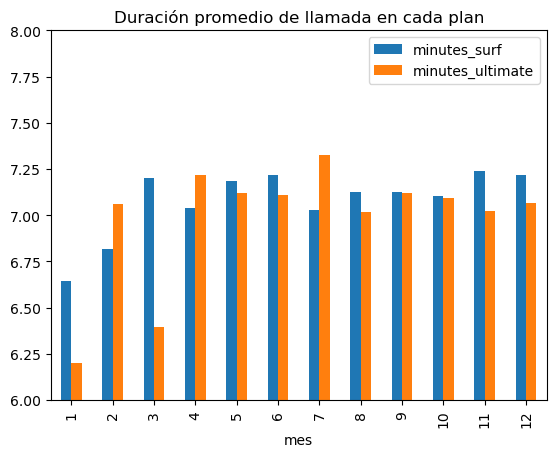

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Columna con duración promedio de llamada
df_usage_merge['av_call']=df_usage_merge['minutes']/df_usage_merge['num_calls']
# Tabla con datos de cada plan por mes
df_calls_surf=df_usage_merge.query('plan_name == "surf"')
df_calls_by_plan_surf=df_calls_surf.groupby(['plan_name','month'])['av_call'].mean().reset_index()
df_calls_ult=df_usage_merge.query('plan_name == "ultimate"')
df_calls_by_plan_ult=df_calls_ult.groupby(['plan_name','month'])['av_call'].mean().reset_index()
df_calls_by_plan=df_calls_by_plan_surf.merge(df_calls_by_plan_ult,on='month',how='outer')
df_calls_by_plan.columns=['Surf', 'month', 'minutes_surf', 'Ultimate', 'minutes_ultimate']
# Análisis
print(df_calls_by_plan.describe())
#Gráfico
df_calls_by_plan.plot(x = "month",y=['minutes_surf','minutes_ultimate'],title='Duración promedio de llamada en cada plan',xlabel='mes',ylim=[6,8],legend=True,kind='bar')
plt.show()

Podemos observar que el promedio de duración de llamada de ambos grupos de usuarios es de 7 min. En el grupo de usuarios de ultimate se ve mayor variabilidad, ya que tiene picos más acentuados. Igualmente en la tabla de descripción vemos que su desviación estandar es casi el doble que para los usuarios de surf. 

<function matplotlib.pyplot.show(close=None, block=None)>

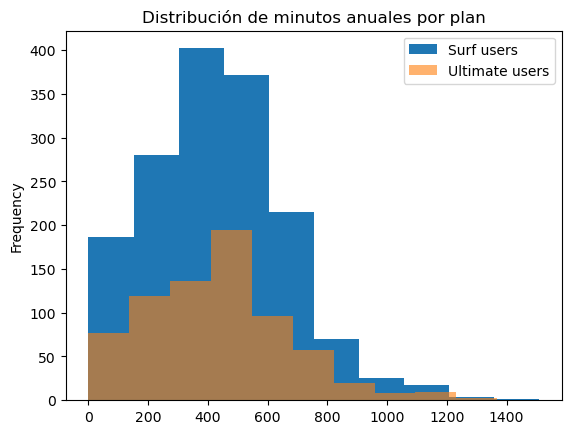

In [31]:
df_usage_merge[df_usage_merge['plan_name']=='surf']['minutes'].plot(kind='hist',bins=10,legend=True,title='Distribución de minutos anuales por plan',xlabel='minutos anuales',ylabel='Frecuencia')
df_usage_merge[df_usage_merge['plan_name']=='ultimate']['minutes'].plot(kind='hist',bins=10,alpha=.6,legend=True)
plt.legend(['Surf users','Ultimate users'])
plt.show


La media de ambos planes es bastante similar: surf:7.07 y ultimate 6.97. En la varianza podemos observar diferencias con surf:.18 y ultimate:.33. Esto se puede ver en el gráfico de barras, ya que las llamadas de los usuarios de ultimate tienen altos y bajos más pronunciados que los usuarios de surf. 

In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('La media de la duración de las llamadas de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['minutes'].mean())
print('la desviación estándar de la duración de las llamadas de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['minutes'].std())
print('La media de la duración de las llamadas de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['minutes'].mean())
print('la desviación estándar de la duración de las llamadas de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['minutes'].std())


La media de la duración de las llamadas de los usuarios de surf es: 428.7495232040687
la desviación estándar de la duración de las llamadas de los usuarios de surf es: 234.45314982027938
La media de la duración de las llamadas de los usuarios de ultimate es: 430.45
la desviación estándar de la duración de las llamadas de los usuarios de ultimate es: 240.50876244378125


<function matplotlib.pyplot.show(close=None, block=None)>

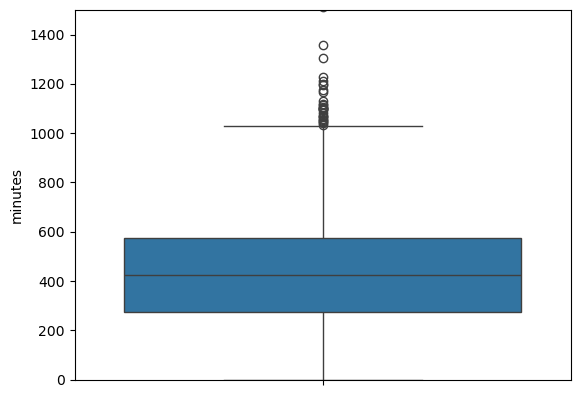

In [64]:

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='surf']['minutes'])

plt.ylim(0, 1500)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

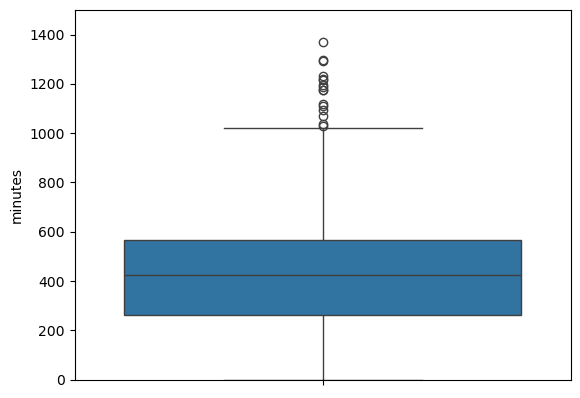

In [63]:
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='ultimate']['minutes'])
plt.ylim(0, 1500)
plt.show


Después de observar todas los gráficos, concluimos: La duración media de las llamadas no cambia mucho con respecto al plan.

### Mensajes

           month  messages_surf  messages_ultimate
count  12.000000      12.000000          12.000000
mean    6.500000      24.656000          31.089497
std     3.605551       9.049246           9.346334
min     1.000000      10.500000          15.500000
25%     3.750000      16.865217          21.928571
50%     6.500000      26.166013          32.466978
75%     9.250000      31.168455          38.510730
max    12.000000      38.600629          45.006623


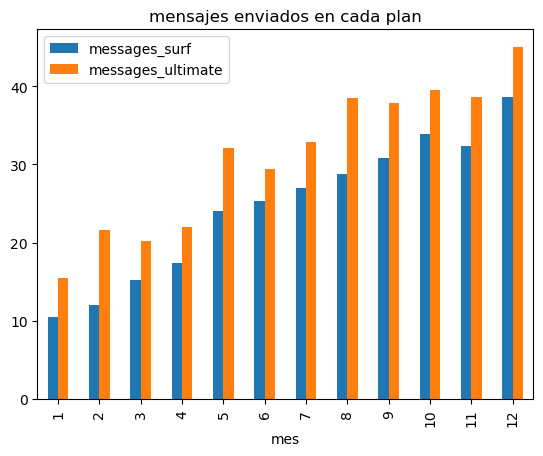

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Tabla con datos de cada plan por mes
df_mess_surf=df_usage_merge.query('plan_name == "surf"')
df_mess_by_plan_surf=df_mess_surf.groupby(['plan_name','month'])['messages'].mean().reset_index()
df_mess_ult=df_usage_merge.query('plan_name == "ultimate"')
df_mess_by_plan_ult=df_mess_ult.groupby(['plan_name','month'])['messages'].mean().reset_index()
df_mess_by_plan=df_mess_by_plan_surf.merge(df_mess_by_plan_ult,on='month',how='outer')
df_mess_by_plan.columns=['surf', 'month', 'messages_surf', 'ultimate', 'messages_ultimate']
# Análisis
print(df_mess_by_plan.describe())
#Gráfico
df_mess_by_plan.plot(x = "month",y=['messages_surf','messages_ultimate'],title='mensajes enviados en cada plan',xlabel='mes',legend=True,kind='bar')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

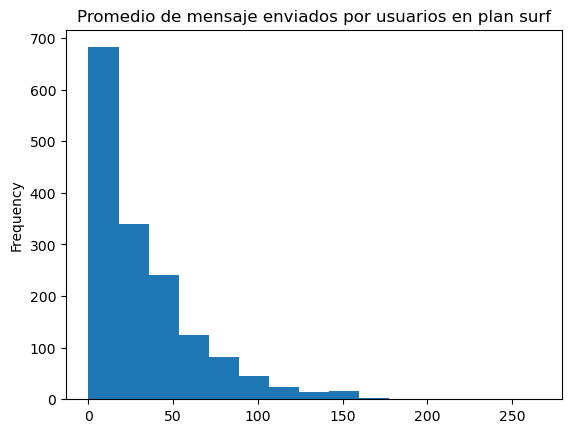

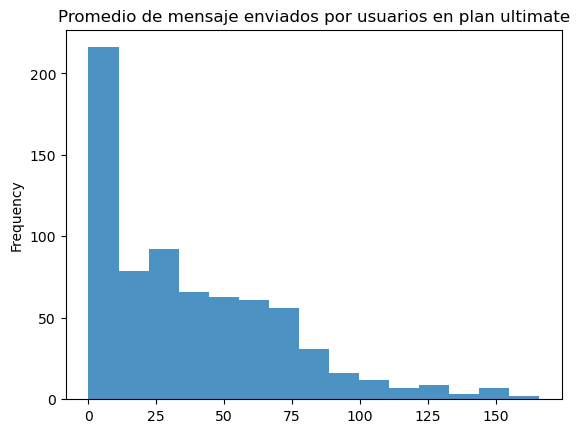

In [36]:
df_hist_mess_surf=df_usage_merge[df_usage_merge['plan_name']=='surf'].groupby(['user_id','month'])['messages'].mean().sort_values(ascending=False).reset_index()
df_hist_mess_ult=df_usage_merge[df_usage_merge['plan_name']=='ultimate'].groupby(['user_id','month'])['messages'].mean().sort_values(ascending=False).reset_index()

df_hist_mess_surf.plot(x='user_id',y='messages',kind='hist',bins=15,legend=False,title='Promedio de mensaje enviados por usuarios en plan surf')
df_hist_mess_ult.plot(x='user_id',y='messages',kind='hist',bins=15,alpha=.8,legend=False,title='Promedio de mensaje enviados por usuarios en plan ultimate')
plt.show





In [37]:
# Calcula la media y la varianza de los mensajes
print('La media de mensajes de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['messages'].mean())
print('la desviación estándar de mensajes de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['messages'].std())
print('La media de mensajes de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['messages'].mean())
print('la desviación estándar de mensajes de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['messages'].std())


La media de mensajes de los usuarios de surf es: 31.15956770502225
la desviación estándar de mensajes de los usuarios de surf es: 33.566717473569085
La media de mensajes de los usuarios de ultimate es: 37.55138888888889
la desviación estándar de mensajes de los usuarios de ultimate es: 34.767179114045675


<function matplotlib.pyplot.show(close=None, block=None)>

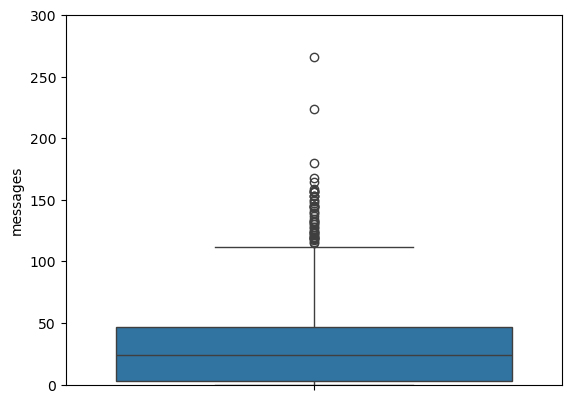

In [65]:

# Traza un diagrama de caja para visualizar la distribución de los mensajes
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='surf']['messages'])

plt.ylim(0, 300)
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

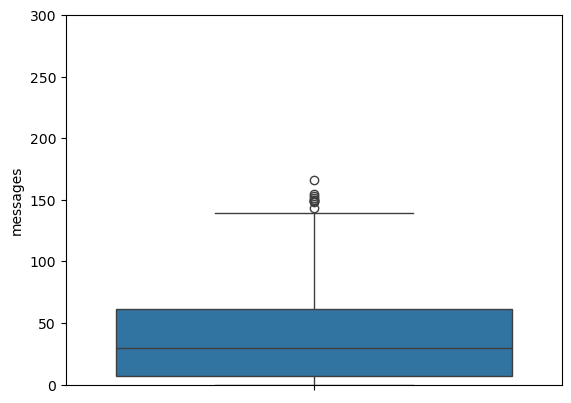

In [66]:
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='ultimate']['messages'])
plt.ylim(0, 300)
plt.show


Podemos observar que la media de los mensajes, ni la varianza es muy diferente en ambos planes en promedio al mes. Sin embargo, los usuarios de ultimate tienen un valor máximo más alto y los usuarios de surf tienen más datos atípicos. 

### Internet

           month  mb_used_surf  mb_used_ultimate
count  12.000000     12.000000         12.000000
mean    6.500000  14464.554377      16212.603528
std     3.605551   3642.890430       3057.987791
min     1.000000   4874.860000       6918.092500
25%     3.750000  13053.790833      16288.971996
50%     6.500000  15820.391796      17001.777445
75%     9.250000  16786.533273      17663.095082
max    12.000000  18132.469371      18323.191854


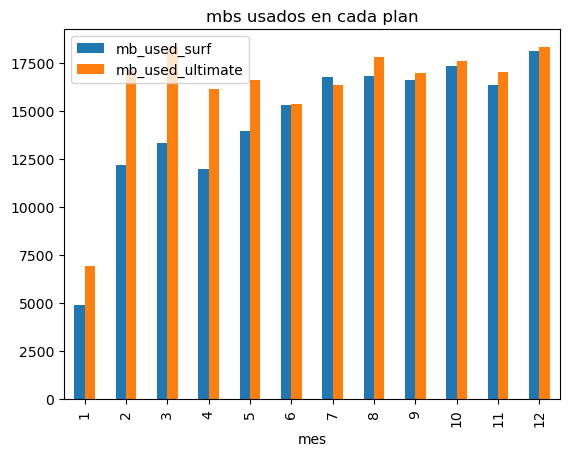

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Tabla con datos de cada plan por mes
df_int_surf=df_usage_merge.query('plan_name == "surf"')
df_int_by_plan_surf=df_int_surf.groupby(['plan_name','month'])['mb_used'].mean().reset_index()
df_int_ult=df_usage_merge.query('plan_name == "ultimate"')
df_int_by_plan_ult=df_int_ult.groupby(['plan_name','month'])['mb_used'].mean().reset_index()
df_int_by_plan=df_int_by_plan_surf.merge(df_int_by_plan_ult,on='month',how='outer')
df_int_by_plan.columns=['surf', 'month', 'mb_used_surf', 'ultimate', 'mb_used_ultimate']
# Análisis
print(df_int_by_plan.describe())
#Gráfico
df_int_by_plan.plot(x = "month",y=['mb_used_surf','mb_used_ultimate'],title='mbs usados en cada plan',xlabel='mes',legend=True,kind='bar')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

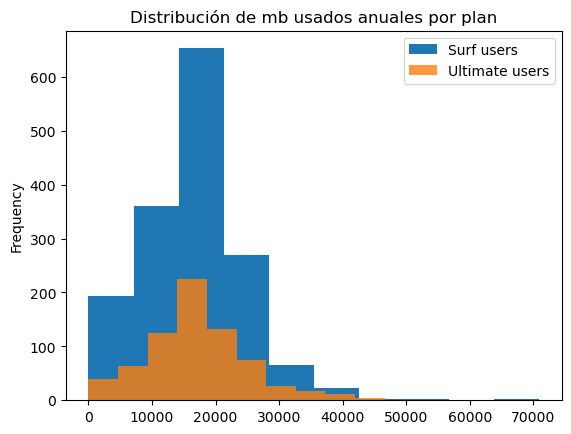

In [41]:

df_usage_merge[df_usage_merge['plan_name']=='surf']['mb_used'].plot(kind='hist',bins=10,legend=True,title='Distribución de mb usados anuales por plan',xlabel='mb anuales',ylabel='Frecuencia')
df_usage_merge[df_usage_merge['plan_name']=='ultimate']['mb_used'].plot(kind='hist',bins=10,alpha=.8,legend=True)
plt.legend(['Surf users','Ultimate users'])
plt.show



In [42]:
# Calcula la media y la varianza del uso de mbs
print('La media de los mbs usados de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['mb_used'].mean())
print('la desviación estándar de los mbs usados de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['mb_used'].std())
print('La media de los mbs usados de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['mb_used'].mean())
print('la desviación estándar de los mbs usados de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['mb_used'].std())


La media de los mbs usados de los usuarios de surf es: 16558.283490146216
la desviación estándar de los mbs usados de los usuarios de surf es: 8013.513326751757
La media de los mbs usados de los usuarios de ultimate es: 17214.699694444447
la desviación estándar de los mbs usados de los usuarios de ultimate es: 7851.897434624211


<function matplotlib.pyplot.show(close=None, block=None)>

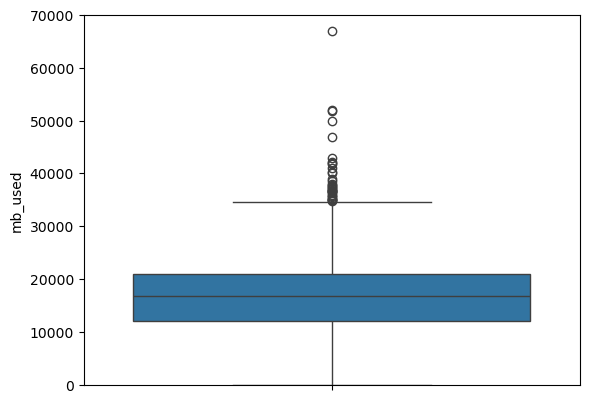

In [67]:

# Traza un diagrama de caja para visualizar la distribución del uso de mbs
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='surf']['mb_used'])
plt.ylim(0, 70000)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

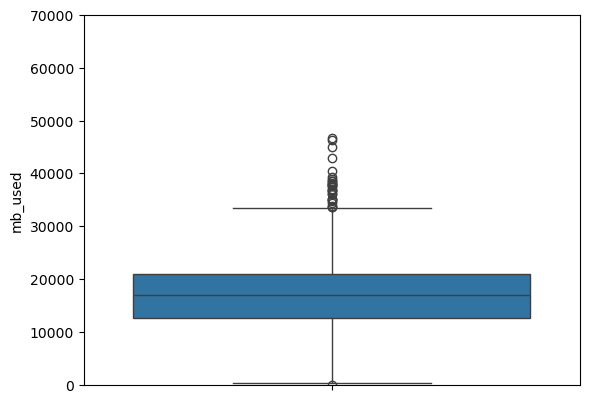

In [68]:

sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='ultimate']['mb_used'])
plt.ylim(0, 70000)
plt.show



Podemos observar que los usuarios de surf tienen un uso de datos mínimo menor al mínimo de los usuarios de ultimate. Sin embargo, los usuarios de surf tienen un rango más amplio de uso de datos, en el gráfico de cajas vemos valores atípicos extremos. 

## Ingreso

Revisaremos los ingresos por plan con un gráfico de barras para mostrar el monto total 'total_fee' promedio de cada tipo de plan. Además de un histograma para analizar la distribución de ambos planes y por último el diagrama de caja para valorar, minimos, maximos y datos atípicos. 

           month  income_surf  income_ultimate
count  12.000000    12.000000        12.000000
mean    6.500000    51.401025        72.011068
std     3.605551    14.698256         1.364068
min     1.000000    20.000000        70.000000
25%     3.750000    44.633628        71.409758
50%     6.500000    53.640282        71.966594
75%     9.250000    62.988330        72.894366
max    12.000000    70.557044        74.666667


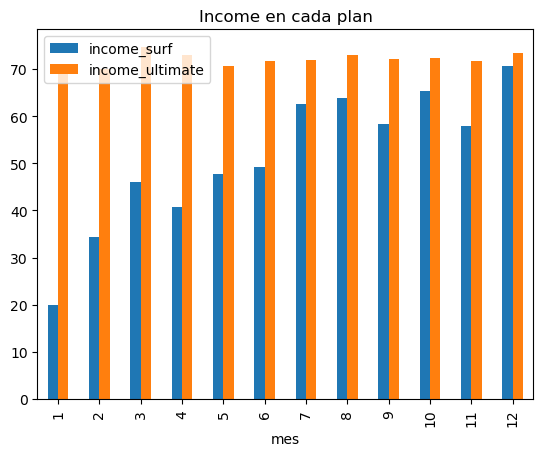

In [45]:
# Tabla con datos de cada plan por mes
df_inc_surf=df_usage_merge.query('plan_name == "surf"')
df_inc_by_plan_surf=df_inc_surf.groupby(['plan_name','month'])['total_fee'].mean().reset_index()
df_inc_ult=df_usage_merge.query('plan_name == "ultimate"')
df_inc_by_plan_ult=df_inc_ult.groupby(['plan_name','month'])['total_fee'].mean().reset_index()
df_inc_by_plan=df_inc_by_plan_surf.merge(df_inc_by_plan_ult,on='month',how='outer')
df_inc_by_plan.columns=['surf', 'month', 'income_surf', 'ultimate', 'income_ultimate']
# Análisis
print(df_inc_by_plan.describe())
#Gráfico
df_inc_by_plan.plot(x = "month",y=['income_surf','income_ultimate'],title='Income en cada plan',xlabel='mes',legend=True,kind='bar')
plt.show()

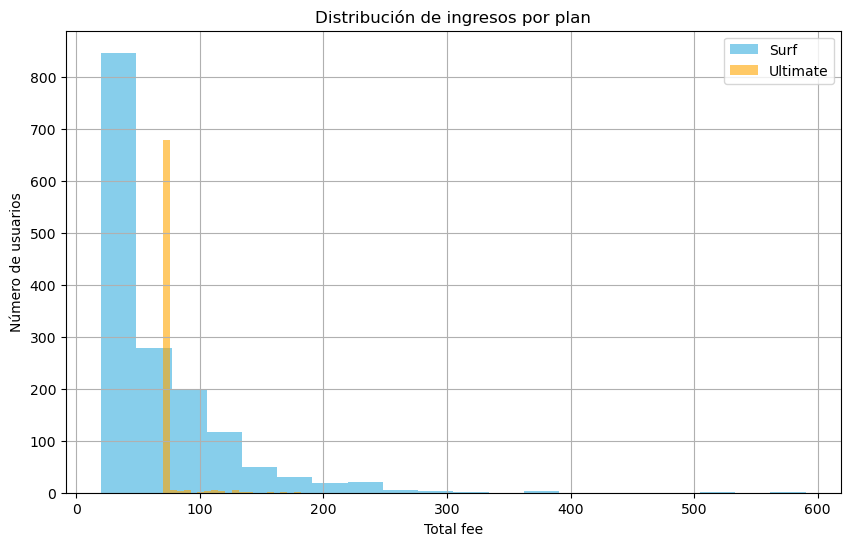

In [46]:

# Distribución de ingresos por plan

plt.figure(figsize=(10, 6))
df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee'].hist(bins=20, label='Surf', color='skyblue')
df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee'].hist(bins=20, alpha=0.6, label='Ultimate', color='orange')
plt.xlabel('Total fee')
plt.ylabel('Número de usuarios')
plt.title('Distribución de ingresos por plan')
plt.legend()
plt.show()

In [47]:
# Calcula la media y la varianza del uso de mbs
print('La media de la tarifa total de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee'].mean())
print('la desviación estándar de la tarifa total de los usuarios de surf es:',df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee'].std())
print('La media de la tarifa total de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee'].mean())
print('la desviación estándar de la tarifa total de los usuarios de ultimate es:',df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee'].std())


La media de la tarifa total de los usuarios de surf es: 60.706408137317226
la desviación estándar de la tarifa total de los usuarios de surf es: 55.38804160009519
La media de la tarifa total de los usuarios de ultimate es: 72.31388888888888
la desviación estándar de la tarifa total de los usuarios de ultimate es: 11.3951079657421


<function matplotlib.pyplot.show(close=None, block=None)>

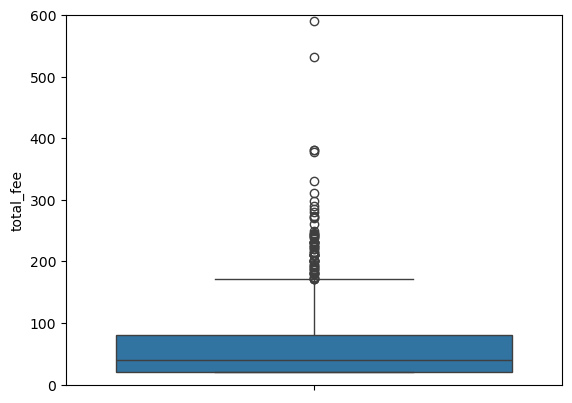

In [69]:
# Traza un diagrama de caja para visualizar la distribución del uso de mbs
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee'])
plt.ylim(0,600)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

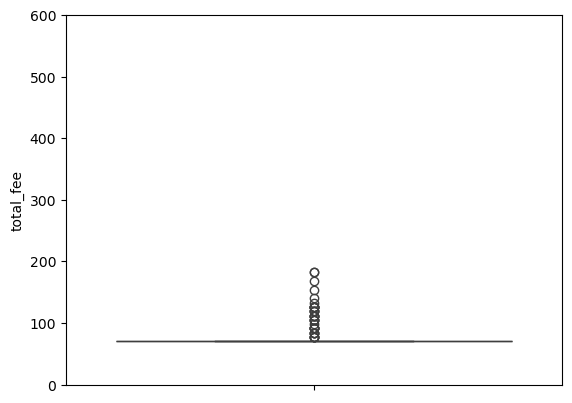

In [70]:
sns.boxplot(df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee'])
plt.ylim(0, 600)
plt.show


Con estos datos podemos concluir que los usuarios de ultimate no suelen pasarse de la tarifa básica. Contrario a los usuarios de surf con gran variabilidad y muchos datos atípicos. 

    month  total_fee  user_id  total_fee_by_user
0       1     320.00        6          53.333333
1       2     799.57       16          49.973125
2       3    1952.65       35          55.790000
3       4    3568.53       71          50.260986
4       5    5718.37      106          53.946887
5       6    8146.80      144          56.575000
6       7   11825.56      180          65.697556
7       8   15529.85      233          66.651717
8       9   17499.67      280          62.498821
9      10   23169.83      343          67.550525
10     11   25522.21      410          62.249293
11     12   33504.14      469          71.437399


<Axes: title={'center': 'Ingresos por mes'}, xlabel='Month', ylabel='Income'>

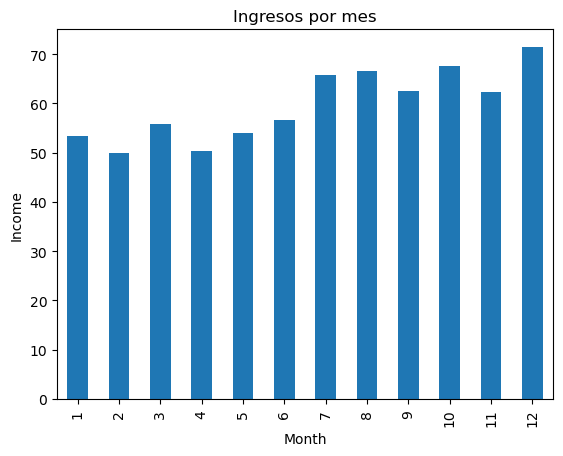

In [50]:
# Ingresos mensuales totales
df_inc_month=df_usage_merge.groupby('month')['total_fee'].sum().reset_index()
df_user_month=df_usage_merge.groupby('month')['user_id'].count().reset_index()
df_inc_merge=df_inc_month.merge(df_user_month,on='month')
df_inc_merge['total_fee_by_user']=df_inc_merge['total_fee']/df_inc_merge['user_id']
print(df_inc_merge)
df_inc_merge.plot(x='month',y='total_fee_by_user',title='Ingresos por mes',kind='bar',xlabel='Month',ylabel='Income',legend=False)

    reg_date_month plan_name  user_id
0                1      surf      210
1                1  ultimate      134
2                2      surf      209
3                2  ultimate       73
4                3      surf      181
5                3  ultimate       55
6                4      surf      244
7                4  ultimate       68
8                5      surf      136
9                5  ultimate       79
10               6      surf      145
11               6  ultimate      110
12               7      surf      111
13               7  ultimate       46
14               8      surf      115
15               8  ultimate       61
16               9      surf       67
17               9  ultimate       38
18              10      surf       88
19              10  ultimate       22
20              11      surf       42
21              11  ultimate       25
22              12      surf       25
23              12  ultimate        9


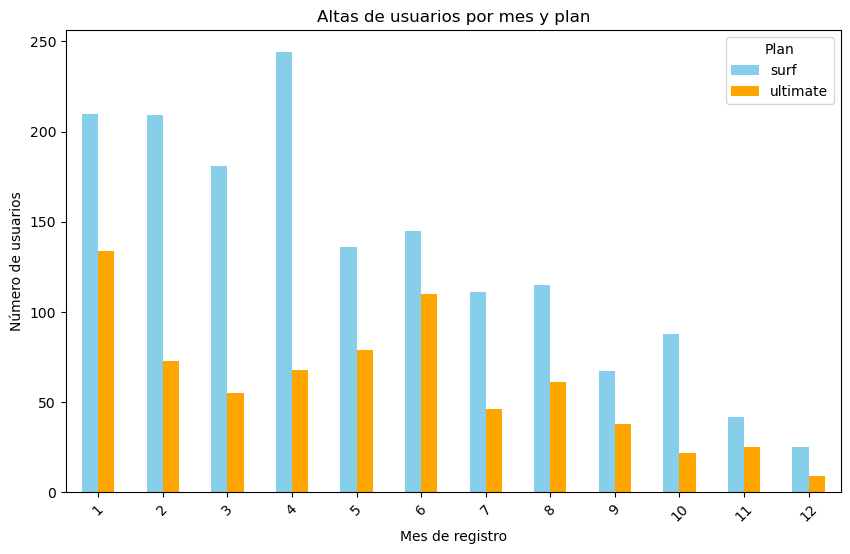

In [51]:
# Alta de usuarios por mes

df_user_reg=df_usage_merge.groupby(['reg_date_month','plan_name'])['user_id'].count().reset_index()
print(df_user_reg)
surf_users=df_user_reg[df_user_reg['plan_name']=='surf']
ultimate_users=df_user_reg[df_user_reg['plan_name']=='ultimate']

# Crear tabla pivote para facilitar el gráfico
df_pivot = df_user_reg.pivot(index='reg_date_month', columns='plan_name', values='user_id')
df_pivot.fillna(0, inplace=True)

# Gráfico de barras agrupadas
df_pivot.plot(kind='bar', 
              title='Altas de usuarios por mes y plan', 
              xlabel='Mes de registro', 
              ylabel='Número de usuarios',
              color=['skyblue', 'orange'],
              figsize=(10, 6))
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.show()


   churn_date_month plan_name  user_id
0                 7  ultimate        8
1                 8  ultimate        6
2                 9      surf       30
3                10      surf       20
4                10  ultimate       10
5                11      surf       31
6                11  ultimate       17
7                12      surf       25
8                12  ultimate       11


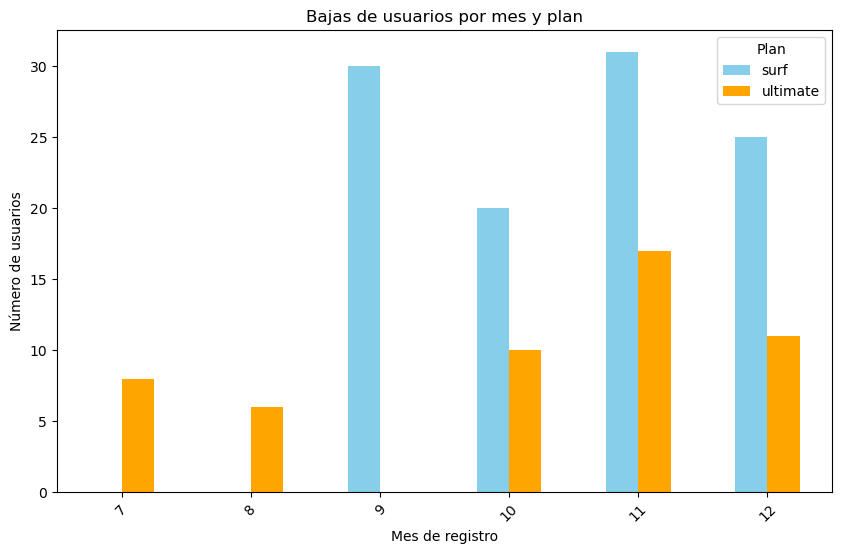

In [52]:
# Baja de usuarios por mes

df_user_chu=df_usage_merge[df_usage_merge['churn_date']!='01-01-1900'].groupby(['churn_date_month','plan_name'])['user_id'].count().reset_index()
print(df_user_chu)
surf_users=df_user_chu[df_user_chu['plan_name']=='surf']
ultimate_users=df_user_chu[df_user_chu['plan_name']=='ultimate']

# Crear tabla pivote para facilitar el gráfico
df_pivot = df_user_chu.pivot(index='churn_date_month', columns='plan_name', values='user_id')
df_pivot.fillna(0, inplace=True)

# Gráfico de barras agrupadas
df_pivot.plot(kind='bar', 
              title='Bajas de usuarios por mes y plan', 
              xlabel='Mes de registro', 
              ylabel='Número de usuarios',
              color=['skyblue', 'orange'],
              figsize=(10, 6))
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

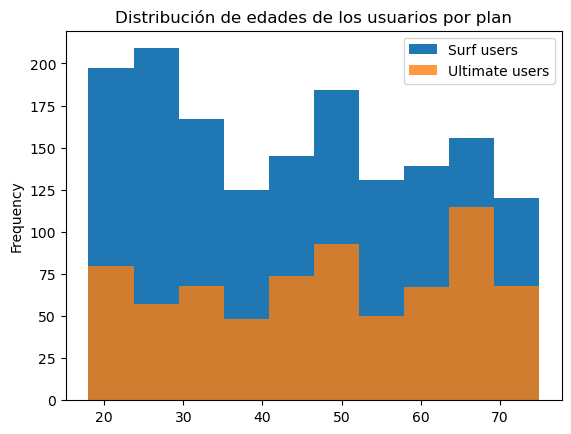

In [53]:

# Grupos de edades de usuarios
df_usage_merge[df_usage_merge['plan_name']=='surf']['age'].plot(kind='hist',bins=10,legend=True,title='Distribución de edades de los usuarios por plan',xlabel='edad',ylabel='Frecuencia')
df_usage_merge[df_usage_merge['plan_name']=='ultimate']['age'].plot(kind='hist',bins=10,alpha=.8,legend=True)
plt.legend(['Surf users','Ultimate users'])
plt.show


     age plan_name  total_fee
0     18      surf  52.093065
1     18  ultimate  71.666667
2     19      surf  67.501034
3     19  ultimate  70.000000
4     20      surf  66.550789
..   ...       ...        ...
104   73  ultimate  70.875000
105   74      surf  59.125455
106   74  ultimate  70.000000
107   75      surf  59.803333
108   75  ultimate  70.000000

[109 rows x 3 columns]


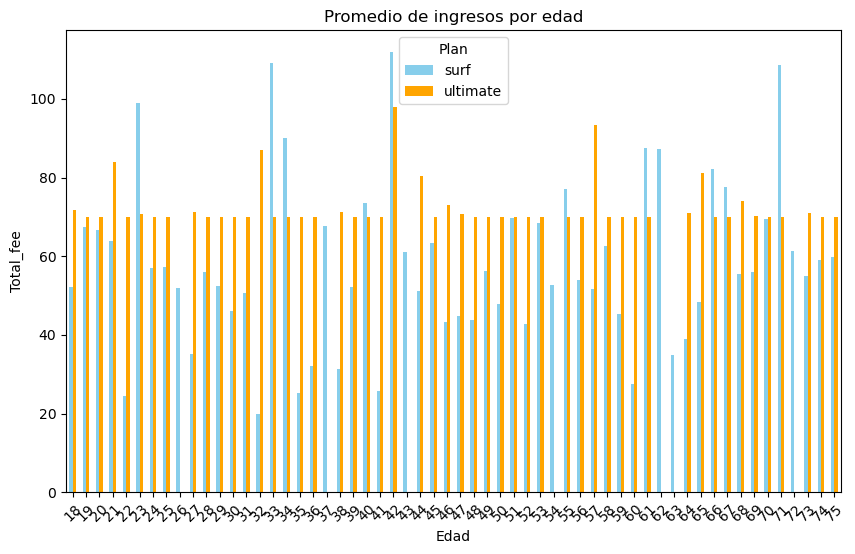

In [54]:
# Promedio de ingreso por grupo de edad

df_user_av_inc_by_age=df_usage_merge.groupby(['age','plan_name'])['total_fee'].mean().reset_index()
print(df_user_av_inc_by_age)
surf_users=df_user_av_inc_by_age[df_user_av_inc_by_age['plan_name']=='surf']
ultimate_users=df_user_av_inc_by_age[df_user_av_inc_by_age['plan_name']=='ultimate']

# Crear tabla pivote para facilitar el gráfico
df_pivot = df_user_av_inc_by_age.pivot(index='age', columns='plan_name', values='total_fee')
df_pivot.fillna(0, inplace=True)

# Gráfico de barras agrupadas
df_pivot.plot(kind='bar', 
              title='Promedio de ingresos por edad', 
              xlabel='Edad', 
              ylabel='Total_fee',
              color=['skyblue', 'orange'],
              figsize=(10, 6))
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.show()


    state plan_name  total_fee
0      AL      surf  45.015000
1      AL  ultimate  70.000000
2      AZ      surf  64.444839
3      AZ  ultimate  70.000000
4      CA      surf  57.928667
..    ...       ...        ...
70  VA-NC      surf  55.000000
71  VA-NC  ultimate  70.000000
72     WA      surf  60.599535
73     WA  ultimate  70.000000
74     WI      surf  67.408571

[75 rows x 3 columns]


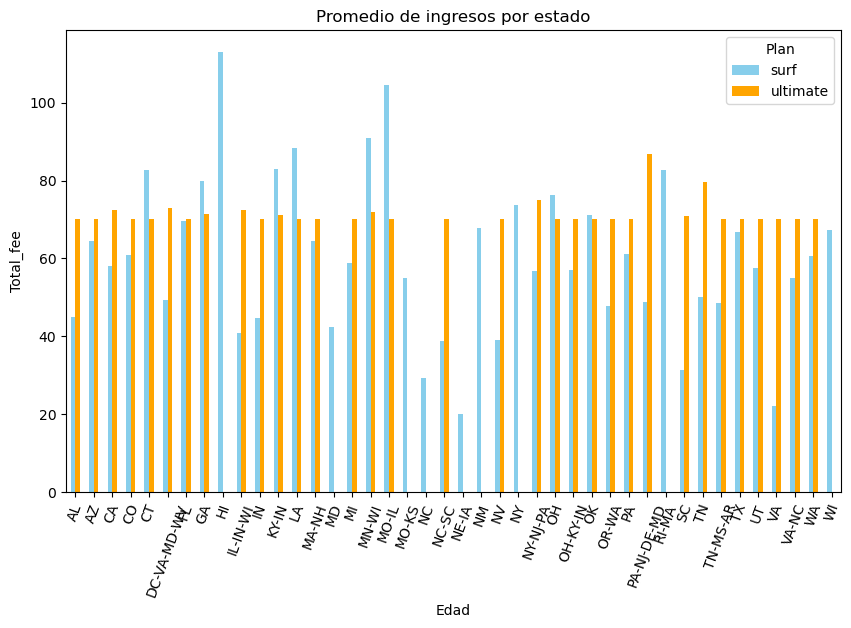

In [55]:
# Promedio de ingresos por estado

df_user_av_inc_by_sta=df_usage_merge.groupby(['state','plan_name'])['total_fee'].mean().reset_index()
print(df_user_av_inc_by_sta)
surf_users=df_user_av_inc_by_sta[df_user_av_inc_by_sta['plan_name']=='surf']
ultimate_users=df_user_av_inc_by_sta[df_user_av_inc_by_sta['plan_name']=='ultimate']

# Crear tabla pivote para facilitar el gráfico
df_pivot = df_user_av_inc_by_sta.pivot(index='state', columns='plan_name', values='total_fee')
df_pivot.fillna(0, inplace=True)

# Gráfico de barras agrupadas
df_pivot.plot(kind='bar', 
              title='Promedio de ingresos por estado', 
              xlabel='Edad', 
              ylabel='Total_fee',
              color=['skyblue', 'orange'],
              figsize=(10, 6))
plt.legend(title='Plan')
plt.xticks(rotation=70)
plt.show()


                                    city plan_name   total_fee
0                Albany-Schenectady-Troy      surf  148.220000
1                            Albuquerque      surf   67.732143
2          Atlanta-Sandy Springs-Roswell      surf   79.923810
3          Atlanta-Sandy Springs-Roswell  ultimate   71.346154
4           Austin-Round Rock-Georgetown      surf   56.052609
..                                   ...       ...         ...
117                       Urban Honolulu      surf  112.932381
118  Virginia Beach-Norfolk-Newport News      surf   55.000000
119  Virginia Beach-Norfolk-Newport News  ultimate   70.000000
120      Washington-Arlington-Alexandria      surf   49.420250
121      Washington-Arlington-Alexandria  ultimate   72.863636

[122 rows x 3 columns]


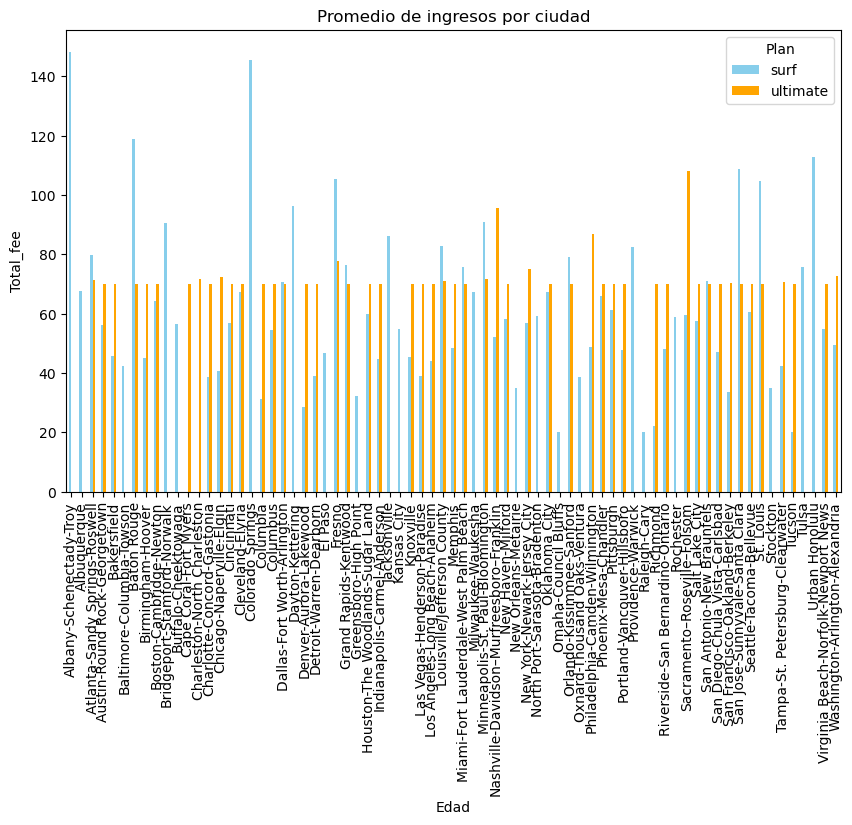

In [56]:
# Promedio de ingresos por ciudad
df_user_av_inc_by_cit=df_usage_merge.groupby(['city','plan_name'])['total_fee'].mean().reset_index()
print(df_user_av_inc_by_cit)
surf_users=df_user_av_inc_by_cit[df_user_av_inc_by_cit['plan_name']=='surf']
ultimate_users=df_user_av_inc_by_cit[df_user_av_inc_by_cit['plan_name']=='ultimate']

# Crear tabla pivote para facilitar el gráfico
df_pivot = df_user_av_inc_by_cit.pivot(index='city', columns='plan_name', values='total_fee')
df_pivot.fillna(0, inplace=True)

# Gráfico de barras agrupadas
df_pivot.plot(kind='bar', 
              title='Promedio de ingresos por ciudad', 
              xlabel='Edad', 
              ylabel='Total_fee',
              color=['skyblue', 'orange'],
              figsize=(10, 6))
plt.legend(title='Plan')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Top 20 usuarios con promedio de tarifa más alto
df_user_top_users = df_usage_merge.groupby(['user_id'])['total_fee'].mean().sort_values(ascending=False).reset_index()
df_user_top_users=df_user_top_users.merge(df_use,on='user_id',how='left')
print(df_user_top_users.head(20))


    user_id   total_fee first_name last_name  age  \
0      1379  320.185000    Jarrett   Spencer   34   
1      1121  275.705000  Kathaleen    Albert   34   
2      1292  263.333333     Cassey    French   42   
3      1240  236.350000      Drema     Lopez   61   
4      1147  199.353750     Duncan    Malone   71   
5      1418  188.000000        Hal    Barnes   40   
6      1268  183.086000     Britni    Bowers   33   
7      1194  182.492000     Robert    Mclean   40   
8      1215  178.037500     Adelle     Knapp   70   
9      1447  177.976667      Ramon    Hester   62   
10     1293  170.754000      Lanny     Nolan   23   
11     1201  163.465714   Jeanelle   Estrada   61   
12     1003  158.120000   Reynaldo   Jenkins   52   
13     1374  156.125556      Ching     Watts   55   
14     1007  155.776000    Eusebio     Welch   42   
15     1272  152.070000     Ernest   Mercado   23   
16     1098  148.220000     Collin      Sims   33   
17     1267  146.275000        Gia    Parker  

In [58]:
# Top 20 usuarios con promedio de tarifa más bajo
df_user_top_users = df_usage_merge.groupby(['user_id'])['total_fee'].mean().sort_values(ascending=True).reset_index()
df_user_top_users=df_user_top_users.merge(df_use,on='user_id',how='left')
print(df_user_top_users.head(20))


    user_id  total_fee  first_name   last_name  age  \
0      1288       20.0     Jenette        Rush   60   
1      1481       20.0        Roni        Frye   32   
2      1315       20.0        Mora   Schroeder   45   
3      1034       20.0          Jc      Gentry   22   
4      1235       20.0      Felton      Nguyen   50   
5      1423       20.0      Malcom        Neal   61   
6      1290       20.0    Thaddeus     Compton   33   
7      1452       20.0      Miguel      Sparks   32   
8      1429       20.0     Arianna        Rowe   36   
9      1042       20.0  Clementina  Mclaughlin   40   
10     1471       20.0      Britni    Mitchell   59   
11     1286       20.0       Casie   Castaneda   52   
12     1245       20.0       Quinn       David   30   
13     1048       20.0     Linwood     Terrell   42   
14     1049       20.0       Loise       Avery   25   
15     1116       20.0      Moriah       Yates   60   
16     1323       20.0     Pamelia      Atkins   42   
17     146



Se generaron análisis adicionales para generar otras conclusiones: Podemos observar que los ingresos subieron hasta $20 dolares en promedio por usuario del mes de Enero al mes de Diciembre. Tambien vemos que el primer semestre del año hubo más altas de usuarios en ambos planes que en el segundo, mientrás que las bajas se registraron a partir de Julio y continuaron hasta fin de año. 
En cuanto a edades, registramos que la proporción joven esta en surf. Ultimate tiene su pico en la población de 63 a 69 años. Además que la edad que tiene tickets promedios más altos esta en 43 años de edad.
En terminos geográficos tenemos a las ciudades de Colorado springs y Baton-Rouge cómo las ciudades con mayor facturación y a Hawaii y a Montana-Illinois como los estados con mayor facturación. 
Finalmente al revisar el top 20 de usuarios con facturación promedio más alta y baja, vemos que todos son del plan surf. 

Estas conclusiones generan preguntas adicionales:
- ¿Hay una diferencia estadistica significativa entre los ingresos de fin de año a los de inicio de año?
- ¿Hubo algún cambio interno que generará las altas a inicio de año y las bajas a finales?
- ¿Existe cobertura uniforme con ambos planes en todas las áreas de EEUU?
- Si cambiaramos de plan a ultimate al top 20 de usuarios en facturación ¿Bajaría el monto?





## Prueba las hipótesis estadísticas

Utilizaremos una prueba de ttest_ind para verificar que hay una diferencia significativa (alpha.'05') en los promedios de facturación de ambos planes. Se usará una varianza diferente ya que la varianza en surf es prácticamente el doble que la de ultimate

In [59]:

# Prueba las hipótesis
sample_1=df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee']
sample_2=df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee']
# Se considera a alpha con 5% y las varianzas son diferentes.
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=False)
if result.pvalue < alpha:
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue)
else:
    print('Se acepta la hipótesis nula, pvalue:', result.pvalue)


Se rechaza la hipótesis nula, pvalue: 3.1703905481135738e-15




Hipotesis nula: Los ingresos promedio por los usuarios de surf son mayores que los de los usuarios de ultimate.

Hipotesis alternativa: Los ingresos promedio por los usuarios de surf son menores que los de los usuarios de ultimate.


Alpha:.05


In [60]:

# Prueba las hipótesis
sample_1=df_usage_merge[df_usage_merge['plan_name']=='surf']['total_fee']
sample_2=df_usage_merge[df_usage_merge['plan_name']=='ultimate']['total_fee']
# Se considera a alpha con 5% y las varianzas son diferentes.
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=False)

if (result.pvalue/2 < alpha) and (sample_1.mean()<sample_2.mean()):
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue,' promedio surf:',sample_1.mean(),' promedio ultimate:',sample_2.mean())
else:
    print('Se acepta la hipótesis nula, pvalue:',result.pvalue,' promedio surf:',sample_1.mean(),' promedio ultimate:',sample_2.mean())



Se rechaza la hipótesis nula, pvalue: 3.1703905481135738e-15  promedio surf: 60.706408137317226  promedio ultimate: 72.31388888888888


Utilizaremos una prueba de ttest_ind para verificar que hay una diferencia significativa (alpha.'05') en los promedios de facturación del área NY-NJ-PA con respecto a otras áreas. Se usará una varianza igual, ya que no difiere al sacar la descripción de los datos de ambos grupos. 

Hipotesis nula: Los ingresos promedio por los usuarios de otras áreas son iguales que los de los usuarios de NY-NJ-PA

Hipotesis alternativa: Los ingresos promedio por los usuarios de otras áreas son mayores que los de los usuarios de NY-NJ-PA.


Alpha:.05


In [61]:
# Prueba las hipótesis
sample_1=df_usage_merge[df_usage_merge['state']=='NY-NJ-PA']['total_fee']
sample_2=df_usage_merge[df_usage_merge['state']!='NY-NJ-PA']['total_fee']

# Se considera a alpha con 5% y las varianzas iguales.
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=False)
if result.pvalue/2 < alpha:
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue)
else:
    print('Se acepta la hipótesis nula, pvalue:', result.pvalue)

Se rechaza la hipótesis nula, pvalue: 0.0335256158853001


In [62]:
# Prueba las hipótesis área ingreso de NY-NJ-PA es menor que ingreso del resto de las áreas
sample_1=df_usage_merge[df_usage_merge['state']=='NY-NJ-PA']['total_fee']
sample_2=df_usage_merge[df_usage_merge['state']!='NY-NJ-PA']['total_fee']

# Se considera a alpha con 5% y las varianzas son iguales
alpha=.05
result=st.ttest_ind(sample_1,sample_2,equal_var=False)

if (result.pvalue < alpha) and (sample_1.mean()<sample_2.mean()):
    print('Se rechaza la hipótesis nula, pvalue:',result.pvalue,' promedio NY-NJ-PA:',sample_1.mean(),' promedio otras áreas:',sample_2.mean())
else:
    print('Se acepta la hipótesis nula, pvalue:',result.pvalue,' promedio NY-NJ-PA:',sample_1.mean(),' promedio otras áreas:',sample_2.mean())



Se rechaza la hipótesis nula, pvalue: 0.0335256158853001  promedio NY-NJ-PA: 59.921352785145885  promedio otras áreas: 65.2227713987474


## Conclusión general

Al preparar los datos se revisaron con info(), describe() y head(), para garantizar que los tipos de datos sean correctos, se validó si hay valores nulos, que estuvieran separados correctamente y visualizados para poder manejarlos en los siguientes pasos.

Se utilizó el método .merge para generar una sólo tabla con los datos de usuario y periodo con todos los consumos y generar la tarifa final que pagaron los usuarios. 

Durante el ejercicio de análisis se revisó:

Las diferencias de comportamiento entre minutos promedio por llamada, número de mensajes, mbs usados e ingreso promedio de usuarios de surf y ultimate.
Ingresos por mes
Altas de usuarios por mes
Bajas de usuarios por mes
Grupos de edad de los usuarios
Ingresos por grupos de edad
Ingresos por estado
Ingresos por ciudad
Top usuarios más rentables.
Top usuarios menos rentables.

Se observó que el promedio de duración de llamada de ambos grupos de usuarios es de 7 min. En el grupo de usuarios de ultimate se ve mayor variabilidad, ya que tiene picos más acentuados. Igualmente en la tabla de descripción vemos que su desviación estandar es casi el doble que para los usuarios de surf. Después de observar todas los gráficos, concluimos: La duración media de las llamadas no cambia mucho con respecto al plan.

Revisamos que la media de los mensajes, ni la varianza es muy diferente en ambos planes en promedio al mes. Sin embargo, los usuarios de ultimate tienen un valor máximo más alto y los usuarios de surf tienen más datos atípicos.

Los usuarios de surf tienen un uso de datos mínimo menor al mínimo de los usuarios de ultimate. Sin embargo, los usuarios de surf tienen un rango más amplio de uso de datos, en el gráfico de cajas vemos valores atípicos extremos.

Los usuarios de ultimate no suelen pasarse de la tarifa básica. Contrario a los usuarios de surf con gran variabilidad y muchos datos atípicos.

Se generaron análisis adicionales para generar otras conclusiones: Podemos observar que los ingresos subieron hasta $20 dolares en promedio por usuario del mes de Enero al mes de Diciembre. Tambien vemos que el primer semestre del año hubo más altas de usuarios en ambos planes que en el segundo, mientrás que las bajas se registraron a partir de Julio y continuaron hasta fin de año. 
En cuanto a edades, registramos que la proporción joven esta en surf. Ultimate tiene su pico en la población de 63 a 69 años. Además que la edad que tiene tickets promedios más altos esta en 43 años de edad.
En terminos geográficos tenemos a las ciudades de Colorado springs y Baton-Rouge cómo las ciudades con mayor facturación y a Hawaii y a Montana-Illinois como los estados con mayor facturación. 
Finalmente al revisar el top 20 de usuarios con facturación promedio más alta y baja, vemos que todos son del plan surf. 

Estas conclusiones generan preguntas adicionales:
- ¿Hay una diferencia estadistica significativa entre los ingresos de fin de año a los de inicio de año?
- ¿Hubo algún cambio interno que generará las altas a inicio de año y las bajas a finales?
- ¿Existe cobertura uniforme con ambos planes en todas las áreas de EEUU?
- Si cambiaramos de plan a ultimate al top 20 de usuarios en facturación ¿Bajaría el monto?

Finalmente evaluamos las hipotesis donde el promedio de facturación de ambos planes era igual, y si el área de NY-NJ-PA tenia una facturación igual al resto de las áreas del análisis. 

Finalmente concluimos que ambas hipotesis nulas debian ser rechazadas. Por lo que revisamos tambien que tuvimos que aceptar la hipotesis alternativa que la facturación de surf era superior y que el resto de áreas factura más que la region de NJ-NY-PA.




